In [4]:
import pandas as pd
import dask.dataframe as dd
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score, mean_squared_error
from dask.distributed import Client


In [5]:
import numpy as np
import time

In [6]:
# Loading data
df_distance = pd.read_csv('../data/Trips_by_Distance.csv')
df_distance.head()

,Level,Date,State FIPS,State Postal Code,County FIPS,County Name,Population Staying at Home,Population Not Staying at Home,Number of Trips,Number of Trips <1,...,Number of Trips 5-10,Number of Trips 10-25,Number of Trips 25-50,Number of Trips 50-100,Number of Trips 100-250,Number of Trips 250-500,Number of Trips >=500,Row ID,Week,Month
0,National,1/1/2019,NaN,NaN,NaN,NaN,77433867.0,248733553.0,8.977844e+08,241667151.0,...,129670778.0,116904343.0,40432062.0,15686639.0,7525563.0,1806022.0,1728112.0,00-00000-20190101,0,1
1,National,1/2/2019,NaN,NaN,NaN,NaN,61305201.0,264862219.0,1.139452e+09,291276735.0,...,171637514.0,167412698.0,56148976.0,17739183.0,7817044.0,1962301.0,1531219.0,00-00000-20190102,0,1
2,National,1/3/2019,NaN,NaN,NaN,NaN,63050480.0,263116940.0,1.162753e+09,296375014.0,...,175775410.0,172027487.0,57632422.0,18366626.0,8124548.0,2038099.0,1567072.0,00-00000-20190103,0,1
3,National,1/4/2019,NaN,NaN,NaN,NaN,61803652.0,264363768.0,1.181954e+09,293159631.0,...,181324645.0,176144493.0,58761592.0,19315785.0,8687318.0,2096065.0,1569185.0,00-00000-20190104,0,1
4,National,1/5/2019,NaN,NaN,NaN,NaN,64389745.0,261777675.0,1.180477e+09,295459014.0,...,180941769.0,165239790.0,54842134.0,19363939.0,8490791.0,1991159.0,1438664.0,00-00000-20190105,0,1


In [7]:
# Loading large dataset using dask
df_full = dd.read_csv('../data/Trips_Full_Data.csv')
df_full.head()

,Month of Date,Week of Date,Year of Date,Level,Date,Week Ending Date,Trips <1 Mile,People Not Staying at Home,Population Staying at Home,Trips,...,Trips 10-25 Miles,Trips 100-250 Miles,Trips 100+ Miles,Trips 25-100 Miles,Trips 25-50 Miles,Trips 250-500 Miles,Trips 3-5 Miles,Trips 5-10 Miles,Trips 50-100 Miles,Trips 500+ Miles
0,August,Week 32,2019,National,8/4/2019 0:00,10-Aug-19,292959749,258404133,67763287,1322685497,...,200922270,8595827,15338786,79429125,59517188,2273613,171336406,216121882,19911937,4469346
1,August,Week 32,2019,National,8/5/2019 0:00,10-Aug-19,317133861,262199758,63967662,1412564488,...,228809869,6535920,12563068,86004297,68184743,1941260,178996059,231048425,17819554,4085888
2,August,Week 32,2019,National,8/6/2019 0:00,10-Aug-19,324443205,260096133,66071287,1437762102,...,235621127,5993704,11104823,87599579,70149166,1741994,179210645,233248732,17450413,3369125
3,August,Week 32,2019,National,8/7/2019 0:00,10-Aug-19,358483024,258878802,67288618,1543710309,...,249988663,5379881,8528574,92200386,74381367,1272248,189163336,243872277,17819019,1876445
4,August,Week 32,2019,National,8/8/2019 0:00,10-Aug-19,300765870,262410045,63757375,1382044815,...,226055368,6259735,12892348,84193587,66724543,1957888,179346163,230933709,17469044,4674725


In [8]:
# Printing the column names of both datasets to observe naming consistency and formatting
print(df_distance.columns)
print(df_full.columns)

# Displaying the data types to identify whether fields such as dates or numerical values are being loaded correctly
print(df_distance.dtypes)
print(df_full.dtypes)

# Checking the shape of the pandas dataset; Dask will return a partially unknown shape due to lazy evaluation
print(df_distance.shape)
df_full.shape  # Dask returns (rows, unknown) — as expected

# Computing and displaying the count of missing values in each column of both datasets
print(df_distance.isnull().sum())
df_full.isnull().sum().compute()


Index(['Level', 'Date', 'State FIPS', 'State Postal Code', 'County FIPS',
       'County Name', 'Population Staying at Home',
       'Population Not Staying at Home', 'Number of Trips',
       'Number of Trips <1', 'Number of Trips 1-3', 'Number of Trips 3-5',
       'Number of Trips 5-10', 'Number of Trips 10-25',
       'Number of Trips 25-50', 'Number of Trips 50-100',
       'Number of Trips 100-250', 'Number of Trips 250-500',
       'Number of Trips >=500', 'Row ID', 'Week', 'Month'],
      dtype='object')
Index(['Month of Date', 'Week of Date', 'Year of Date', 'Level', 'Date',
       'Week Ending Date', 'Trips <1 Mile', 'People Not Staying at Home',
       'Population Staying at Home', 'Trips', 'Trips 1-25 Miles',
       'Trips 1-3 Miles', 'Trips 10-25 Miles', 'Trips 100-250 Miles',
       'Trips 100+ Miles', 'Trips 25-100 Miles', 'Trips 25-50 Miles',
       'Trips 250-500 Miles', 'Trips 3-5 Miles', 'Trips 5-10 Miles',
       'Trips 50-100 Miles', 'Trips 500+ Miles'],
      dtyp

Month of Date                 0
Week of Date                  0
Year of Date                  0
Level                         0
Date                          0
Week Ending Date              0
Trips <1 Mile                 0
People Not Staying at Home    0
Population Staying at Home    0
Trips                         0
Trips 1-25 Miles              0
Trips 1-3 Miles               0
Trips 10-25 Miles             0
Trips 100-250 Miles           0
Trips 100+ Miles              0
Trips 25-100 Miles            0
Trips 25-50 Miles             0
Trips 250-500 Miles           0
Trips 3-5 Miles               0
Trips 5-10 Miles              0
Trips 50-100 Miles            0
Trips 500+ Miles              0
dtype: int64

In [11]:
# Comparing the unique values (first few) to see which columns align
print(df_distance['Date'].head())
print(df_full['Date'].head())
print(df_full['Week_Ending_Date'].head())

0    1/1/2019
1    1/2/2019
2    1/3/2019
3    1/4/2019
4    1/5/2019
Name: Date, dtype: object
0    8/4/2019 0:00
1    8/5/2019 0:00
2    8/6/2019 0:00
3    8/7/2019 0:00
4    8/8/2019 0:00
Name: Date, dtype: string
0    10-Aug-19
1    10-Aug-19
2    10-Aug-19
3    10-Aug-19
4    10-Aug-19
Name: Week_Ending_Date, dtype: string


In [10]:
# Removing leading/trailing spaces and replacing spaces with underscores
df_distance.columns = df_distance.columns.str.strip().str.replace(' ', '_')
df_full.columns = df_full.columns.str.strip().str.replace(' ', '_').str.replace('-', '_')

# Checking Converstion
print(df_distance.columns)
print(df_full.columns)


Index(['Level', 'Date', 'State_FIPS', 'State_Postal_Code', 'County_FIPS',
       'County_Name', 'Population_Staying_at_Home',
       'Population_Not_Staying_at_Home', 'Number_of_Trips',
       'Number_of_Trips_<1', 'Number_of_Trips_1-3', 'Number_of_Trips_3-5',
       'Number_of_Trips_5-10', 'Number_of_Trips_10-25',
       'Number_of_Trips_25-50', 'Number_of_Trips_50-100',
       'Number_of_Trips_100-250', 'Number_of_Trips_250-500',
       'Number_of_Trips_>=500', 'Row_ID', 'Week', 'Month'],
      dtype='object')
Index(['Month_of_Date', 'Week_of_Date', 'Year_of_Date', 'Level', 'Date',
       'Week_Ending_Date', 'Trips_<1_Mile', 'People_Not_Staying_at_Home',
       'Population_Staying_at_Home', 'Trips', 'Trips_1_25_Miles',
       'Trips_1_3_Miles', 'Trips_10_25_Miles', 'Trips_100_250_Miles',
       'Trips_100+_Miles', 'Trips_25_100_Miles', 'Trips_25_50_Miles',
       'Trips_250_500_Miles', 'Trips_3_5_Miles', 'Trips_5_10_Miles',
       'Trips_50_100_Miles', 'Trips_500+_Miles'],
      dtyp

In [12]:
# Date Conversion
df_distance['Date'] = pd.to_datetime(df_distance['Date'])
df_full['Date'] = dd.to_datetime(df_full['Date'], errors='coerce')

# Checking conversion
print(df_distance['Date'].head())
print(df_distance['Date'].dtype)

print(df_full['Date'].head())
print(df_full['Date'].dtype)


0   2019-01-01
1   2019-01-02
2   2019-01-03
3   2019-01-04
4   2019-01-05
Name: Date, dtype: datetime64[ns]
datetime64[ns]
0   2019-08-04
1   2019-08-05
2   2019-08-06
3   2019-08-07
4   2019-08-08
Name: Date, dtype: datetime64[ns]
datetime64[ns]


In [13]:
#  Dealing with Categorical Missing Values
columns_to_fill = ['Number_of_Trips_10-25', 'Number_of_Trips_25-50']
for col in columns_to_fill:
    df_distance[col] = df_distance[col].fillna(df_distance[col].mean())

df_distance[columns_to_fill].isnull().sum()


Number_of_Trips_10-25    0
Number_of_Trips_25-50    0
dtype: int64

In [14]:
#  Dealing with Numeric Missing Values
df_distance['County_Name'] = df_distance['County_Name'].fillna('Unknown')
df_distance['County_FIPS'] = df_distance['County_FIPS'].fillna(-1)

df_distance[['County_Name', 'County_FIPS']].isnull().sum()


County_Name    0
County_FIPS    0
dtype: int64

In [15]:
print(df_distance.columns)

Index(['Level', 'Date', 'State_FIPS', 'State_Postal_Code', 'County_FIPS',
       'County_Name', 'Population_Staying_at_Home',
       'Population_Not_Staying_at_Home', 'Number_of_Trips',
       'Number_of_Trips_<1', 'Number_of_Trips_1-3', 'Number_of_Trips_3-5',
       'Number_of_Trips_5-10', 'Number_of_Trips_10-25',
       'Number_of_Trips_25-50', 'Number_of_Trips_50-100',
       'Number_of_Trips_100-250', 'Number_of_Trips_250-500',
       'Number_of_Trips_>=500', 'Row_ID', 'Week', 'Month'],
      dtype='object')


In [16]:
# Defining  trip distance bands
short_trip_cols = ['Trips_<1_Mile', 'Trips_1_3_Miles', 'Trips_3_5_Miles']
medium_trip_cols = ['Trips_5_10_Miles', 'Trips_10_25_Miles', 'Trips_25_50_Miles']
long_trip_cols = ['Trips_50_100_Miles', 'Trips_100_250_Miles', 'Trips_250_500_Miles', 'Trips_500+_Miles']

# Creating grouped features
df_full['Short_Distance_Trips'] = df_full[short_trip_cols].sum(axis=1)
df_full['Medium_Distance_Trips'] = df_full[medium_trip_cols].sum(axis=1)
df_full['Long_Distance_Trips'] = df_full[long_trip_cols].sum(axis=1)

# Verifying the new features
print(df_full[['Short_Distance_Trips', 'Medium_Distance_Trips', 'Long_Distance_Trips']].head())

   Short_Distance_Trips  Medium_Distance_Trips  Long_Distance_Trips
0             810873434              476561340             35250723
1             854138829              528043037             30382622
2             870187841              539019025             28555236
3             949120409              568242307             26347593
4             827969803              523713620             30361392


Parallel Computing - Benchmark trip aggregation

In [17]:
# Serial: Pandas timing
start_time = time.time()
pandas_total_trips = df_distance['Number_of_Trips_10-25'].sum()
pandas_duration = time.time() - start_time
print("Pandas result:", pandas_total_trips)
print("Pandas duration:", pandas_duration)

Pandas result: 394199217304.5916
Pandas duration: 0.003983020782470703


In [18]:
# Parallel: Dask timing
start_time = time.time()
dask_total_trips = df_full['Trips_10_25_Miles'].sum().compute()
dask_duration = time.time() - start_time
print("Dask result:", dask_total_trips)
print("Dask duration:", dask_duration)

Dask result: 1617549577
Dask duration: 0.038105010986328125


In [19]:
# Starting timing
start_time = time.time()

# Filtering, grouping, and aggregating data
pandas_result = (
    df_distance[df_distance['Population_Not_Staying_at_Home'] > 10000000]
    .groupby('Month')['Number_of_Trips_10-25']
    .mean()
)

# Stopping timmer
pandas_duration = time.time() - start_time

# Displaying result and duration
print("Pandas processing duration:", pandas_duration)
print(pandas_result)

Pandas processing duration: 0.020845651626586914
Month
1     3.610167e+07
2     3.761936e+07
3     3.946070e+07
4     4.231456e+07
5     4.372531e+07
6     4.465576e+07
7     4.437365e+07
8     4.374341e+07
9     4.503130e+07
10    4.433795e+07
11    4.241120e+07
12    4.328400e+07
Name: Number_of_Trips_10-25, dtype: float64


In [20]:
start_time = time.time()

dask_result = (
    df_full[df_full['People_Not_Staying_at_Home'] > 10000000]
    .groupby('Month_of_Date')['Trips_10_25_Miles']
    .mean()
    .compute()
)

# Stopping Timer
dask_duration = time.time() - start_time

print("Dask processing duration:", dask_duration)
print(dask_result)

Dask processing duration: 0.0937345027923584
Month_of_Date
August    231078511.0
Name: Trips_10_25_Miles, dtype: float64


In [25]:
# Simulate scaling with 10 workers
client = Client(n_workers=10)

start_time = time.time()

dask_result = (
    df_full[df_full['People_Not_Staying_at_Home'] > 10000000]
    .groupby('Month_of_Date')['Trips_10_25_Miles']
    .mean()
    .compute()
)

# Stopping Timer
dask_duration = time.time() - start_time

print("Dask processing duration:", dask_duration)
print(dask_result)

/home/fernandostcampos/.local/lib/python3.10/site-packages/distributed/node.py:187: UserWarning: Port 8787 is already in use.
Perhaps you already have a cluster running?
Hosting the HTTP server on port 35457 instead
  warnings.warn(


Dask processing duration: 0.6305222511291504
Month_of_Date
August    231078511.0
Name: Trips_10_25_Miles, dtype: float64


In [26]:
# 20 workers
client = Client(n_workers=20)

start_time = time.time()

dask_result = (
    df_full[df_full['People_Not_Staying_at_Home'] > 10000000]
    .groupby('Month_of_Date')['Trips_10_25_Miles']
    .mean()
    .compute()
)

# Stopping Timer
dask_duration = time.time() - start_time

print("Dask processing duration:", dask_duration)
print(dask_result)

/home/fernandostcampos/.local/lib/python3.10/site-packages/distributed/node.py:187: UserWarning: Port 8787 is already in use.
Perhaps you already have a cluster running?
Hosting the HTTP server on port 45467 instead
  warnings.warn(


Dask processing duration: 1.3463585376739502
Month_of_Date
August    231078511.0
Name: Trips_10_25_Miles, dtype: float64


R² Score: 0.9682070829479001
Mean Squared Error: 962475137264.6311


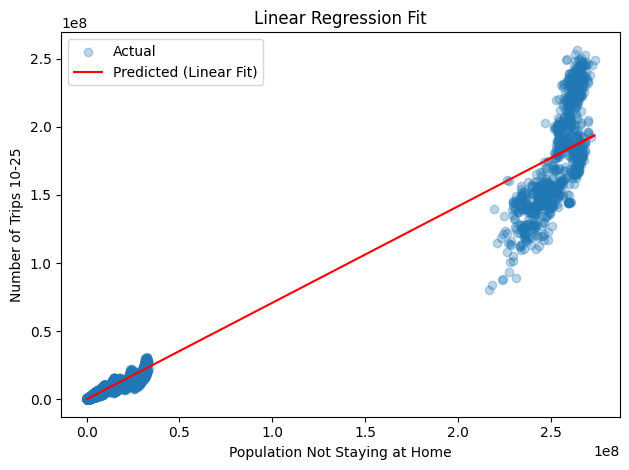

In [66]:
# Preparing data
x = df_distance[['Population_Not_Staying_at_Home']].dropna()
y = df_distance['Number_of_Trips_10-25'].dropna()

# Aligning indexes just in case
x, y = x.align(y, join='inner', axis=0)

# Fitting model
model = LinearRegression()
model.fit(x, y)

# Predictions
y_pred = model.predict(x)

# Evaluation
r2 = r2_score(y, y_pred)
mse = mean_squared_error(y, y_pred)

# Printing results
print("R² Score:", r2)
print("Mean Squared Error:", mse)

# Plotting results
plt.scatter(x, y, alpha=0.3, label='Actual')
plt.plot(x, y_pred, color='red', label='Predicted (Linear Fit)')
plt.xlabel('Population Not Staying at Home')
plt.ylabel('Number of Trips 10-25')
plt.title('Linear Regression Fit')
plt.legend()
plt.tight_layout()
plt.show()

R² Score (Test): 0.9693372790980487
Mean Squared Error (Test): 931651951359.5697


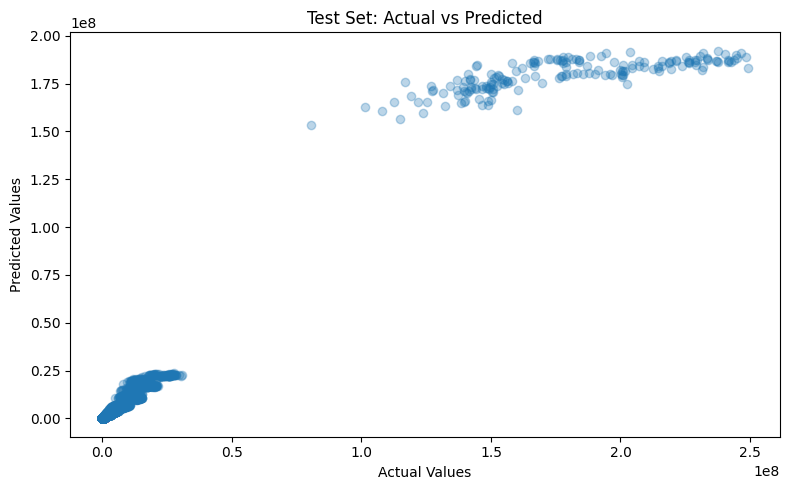

In [68]:
# Splitting the dataset
X = df_distance[['Population_Not_Staying_at_Home']].dropna()
y = df_distance['Number_of_Trips_10-25'].dropna()

# Aligning indices
X, y = X.align(y, join='inner', axis=0)

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Model fitting
model = LinearRegression()
model.fit(X_train, y_train)

# Predictions
y_pred = model.predict(X_test)

# Evaluation
r2 = r2_score(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)

print("R² Score (Test):", r2)
print("Mean Squared Error (Test):", mse)

# Plotting results
plt.figure(figsize=(8, 5))
plt.scatter(y_test, y_pred, alpha=0.3)
plt.xlabel('Actual Values')
plt.ylabel('Predicted Values')
plt.title('Test Set: Actual vs Predicted')
plt.tight_layout()
plt.show()

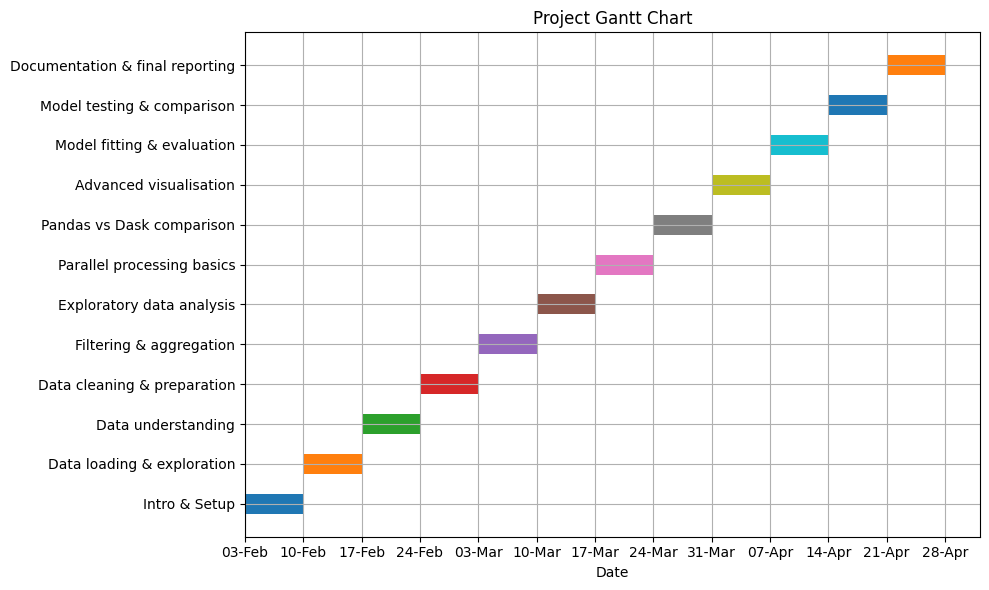

In [28]:
import matplotlib.pyplot as plt
import pandas as pd
import matplotlib.dates as mdates
from datetime import datetime, timedelta

# Task definitions
tasks = [
    ("Intro & Setup", 0, 1),
    ("Data loading & exploration", 1, 2),
    ("Data understanding", 2, 3),
    ("Data cleaning & preparation", 3, 4),
    ("Filtering & aggregation", 4, 5),
    ("Exploratory data analysis", 5, 6),
    ("Parallel processing basics", 6, 7),
    ("Pandas vs Dask comparison", 7, 8),
    ("Advanced visualisation", 8, 9),
    ("Model fitting & evaluation", 9, 10),
    ("Model testing & comparison", 10, 11),
    ("Documentation & final reporting", 11, 12)
]

# Convert to DataFrame for plotting
start_date = datetime(2025, 2, 3)  # Week 0 start (as informed earlier)
data = []
for task, start_week, end_week in tasks:
    start = start_date + timedelta(weeks=start_week)
    end = start_date + timedelta(weeks=end_week)
    data.append({"Task": task, "Start": start, "End": end})

df = pd.DataFrame(data)

# Plotting the Gantt chart
fig, ax = plt.subplots(figsize=(10, 6))
for i, row in df.iterrows():
    ax.barh(row["Task"], (row["End"] - row["Start"]).days, left=row["Start"], height=0.5)

ax.set_xlabel("Date")
ax.set_title("Project Gantt Chart")
ax.xaxis.set_major_locator(mdates.WeekdayLocator(byweekday=mdates.MO))
ax.xaxis.set_major_formatter(mdates.DateFormatter("%d-%b"))
plt.tight_layout()
plt.grid(True)

plt.savefig("/home/fernandostcampos/GitHub/bts-mobility-analysis/Gantt_Chart_DS_Project.png")
plt.show()


In [ ]:
# START

# LOAD 'Trips_by_Distance.csv' as df_distance using pandas
# LOAD 'Trips_Full_Data.csv' as df_full using dask

# INSPECT columns and datatypes in both datasets
# IDENTIFY missing values in each dataframe

# FOR each numeric column with missing data in df_distance:
#     REPLACE nulls with column mean

# FOR each categorical column with missing data in df_distance:
#     REPLACE nulls with placeholder (e.g., 'Unknown')

# CREATE new columns in df_full:
#     - Short_Distance_Trips = sum(<1, 1–3, 3–5 miles)
#     - Medium_Distance_Trips = sum(5–10, 10–25, 25–50 miles)
#     - Long_Distance_Trips = sum(50–100, 100–250, 250–500, 500+ miles)

# PLOT trip distribution by month and by distance category

# SELECT features (e.g., Population_Not_Staying, Number_of_Trips_10-25)
# SPLIT data into training and test sets
# APPLY linear regression model
# EVALUATE using R² and Mean Squared Error

# COMPARE serial vs parallel execution using:
#     - Pandas for serial timing
#     - Dask with 10 and 20 workers for parallel performance

# VISUALISE results
# DOCUMENT findings and interpretations

# END
